# Cars Price Prediction using Linear    Regression

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
car_price = pd.read_csv(R'C:\Users\Pratik G Ratnaparkhi\Desktop\IVY Python\CarPrices.csv')

In [4]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_price.shape

(205, 26)

In [6]:
#Descriptive Analysis

In [7]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
#finding total null values

In [10]:
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
#Creating Dataframe

In [12]:
car_price1 = pd.DataFrame(car_price)


In [13]:
car_price1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
cat = car_price1.iloc[:,[3,4,8,14,17,25]]

In [15]:
cat.head()

,fueltype,aspiration,enginelocation,enginetype,fuelsystem,price
0,gas,std,front,dohc,mpfi,13495.0
1,gas,std,front,dohc,mpfi,16500.0
2,gas,std,front,ohcv,mpfi,16500.0
3,gas,std,front,ohc,mpfi,13950.0
4,gas,std,front,ohc,mpfi,17450.0


In [16]:
#Exploratory Data Analysis
#Finding Some relation between Categorical variables using pairplot from seaborn

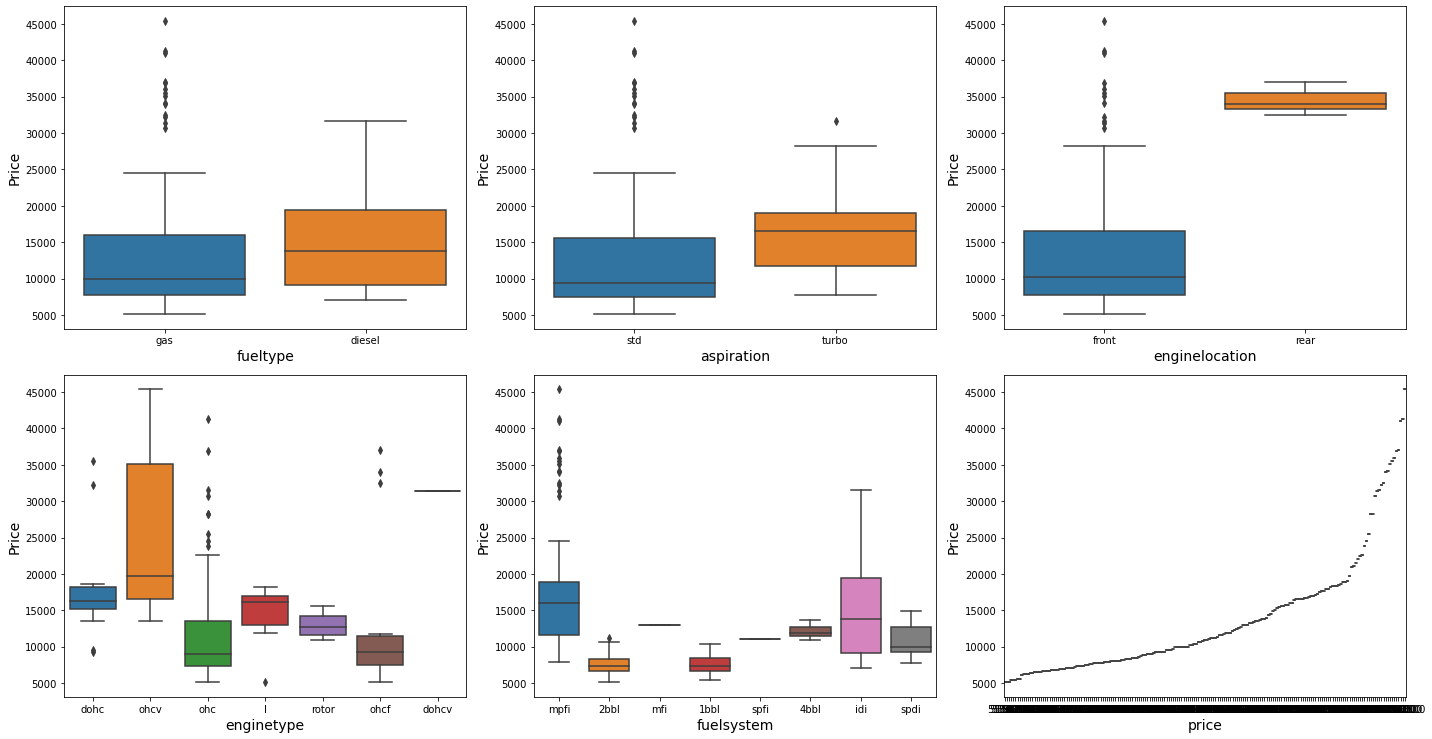

In [17]:
plt.figure(figsize=(20,15))
x=1
for i in cat:
    plt.subplot(3,3,x)
    sns.boxplot(data=cat,y='price',x=i)
    plt.ylabel('Price',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

In [18]:
num = car_price.iloc[:,[20,21,24,25]]
num.head()

,compressionratio,horsepower,highwaympg,price
0,9.0,111,27,13495.0
1,9.0,111,27,16500.0
2,9.0,154,26,16500.0
3,10.0,102,30,13950.0
4,8.0,115,22,17450.0


<Figure size 576x576 with 0 Axes>

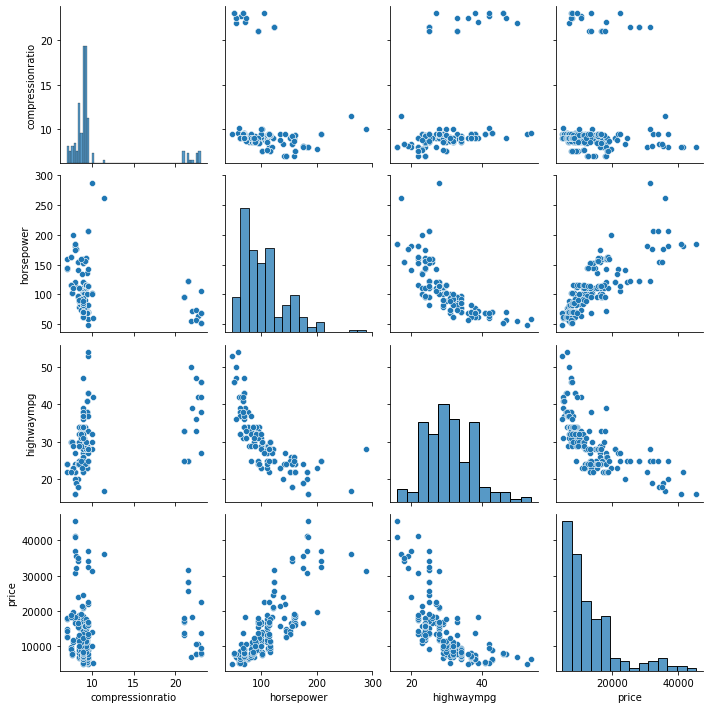

In [19]:
plt.figure(figsize=(8,8))
sns.pairplot(num)
plt.show()

In [20]:
#Finding Correlation and Correaltion matrix 

In [21]:
car_price1.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [22]:
num1 = car_price1.iloc[:,[10,11,12,13,18,19,20,21,22,23,24,25]]

In [23]:
df = num1.corr()
df

,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carlength,1.000000,0.841118,0.491029,0.877728,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.841118,1.000000,0.279210,0.867032,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.491029,0.279210,1.000000,0.295572,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.877728,0.867032,0.295572,1.000000,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
boreratio,0.606454,0.559150,0.171071,0.648480,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.129533,0.182942,-0.055307,0.168790,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.158414,0.181129,0.261214,0.151362,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.552623,0.640732,-0.108802,0.750739,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.287242,-0.220012,-0.320411,-0.266243,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.670909,-0.642704,-0.048640,-0.757414,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751


<AxesSubplot:>

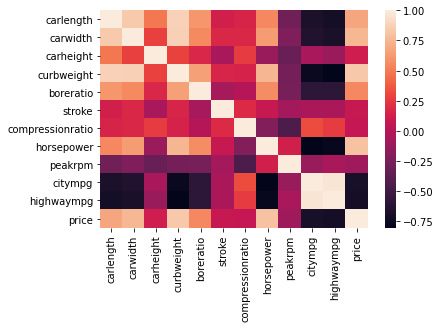

In [24]:
hm = sns.heatmap(df)
hm

In [25]:
#Price distribution by histogram

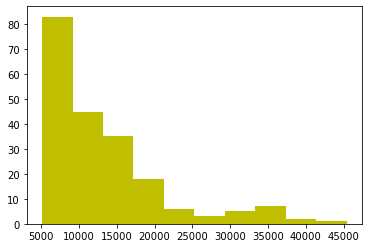

In [26]:
plt.hist(car_price1['price'],bins=10,color='y')
plt.show()

C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

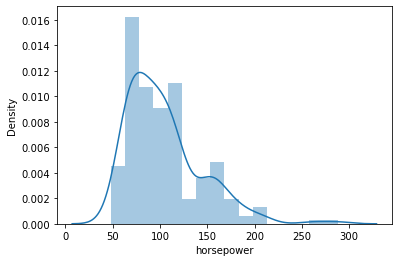

In [27]:
sns.distplot(car_price1['horsepower'])

In [28]:
#Encoding categorical data by pd.get_dummies 
#to get started with it we have to make list of Cat_variable

In [29]:
cat_var = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [30]:
car_price2 = pd.get_dummies(car_price1, columns=cat_var, drop_first=True)
car_price2.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [31]:
price = car_price2.drop(['car_ID','CarName'],axis=1)
price

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [33]:
#Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform((price.drop('price',axis = 1)))

In [35]:
#Creating Dependent and Independent variable

In [72]:
x = x_scaled
y = price["price"]
x= pd.DataFrame(data=x,columns = price.drop(columns=['price']).columns)

In [73]:
x.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,...,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,...,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,...,-0.108774,0.054482,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,...,-0.050450,-0.110878,-0.000187,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,...,-0.011354,0.023986,-0.026436,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654


In [74]:
#Testing Multicollinearity using Variance Inflation Factor
#we are using user def function to calculate the vif values for all columns

In [75]:
vif_data=x
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


symboling                  3.729848
wheelbase                 14.340698
carlength                 15.284346
carwidth                  11.142078
carheight                  4.122954
curbweight                33.675355
enginesize                49.505517
boreratio                  7.910548
stroke                     3.372270
compressionratio         184.331513
horsepower                32.769609
peakrpm                    3.687826
citympg                   39.271860
highwaympg                36.372517
fueltype_gas                    inf
aspiration_turbo           4.924978
doornumber_two             3.583152
carbody_hardtop            3.014287
carbody_hatchback         14.277551
carbody_sedan             18.755490
carbody_wagon              9.629068
drivewheel_fwd            11.155078
drivewheel_rwd            14.382330
enginelocation_rear        3.935689
enginetype_dohcv           4.501176
enginetype_l               6.049283
enginetype_ohc             7.039164
enginetype_ohcf            7

In [76]:
#Removing columns with high multicollinearity using user def func

In [77]:
def removecol(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        return data

In [78]:
for i in range(10):
    vif_data=removecol(vif_data)
vif_data.head()

C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,symboling,wheelbase,carlength,carwidth,carheight,boreratio,stroke,peakrpm,highwaympg,aspiration_turbo,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,0.519071,-1.839377,-0.262960,-0.546059,-0.469295,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,0.519071,-1.839377,-0.262960,-0.546059,-0.469295,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,-2.404880,0.685946,-0.262960,-0.691627,-0.469295,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.517266,0.462183,0.787855,-0.109354,-0.469295,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
4,0.938490,0.107110,0.207256,0.230001,0.235942,-0.517266,0.462183,0.787855,-1.273900,-0.469295,...,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014


In [79]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

symboling                 3.131467
wheelbase                10.522551
carlength                12.322315
carwidth                  9.262794
carheight                 3.505198
boreratio                 3.871581
stroke                    2.519175
peakrpm                   2.424774
highwaympg                7.568231
aspiration_turbo          2.195616
doornumber_two            3.144688
carbody_hardtop           1.546260
carbody_hatchback         2.376533
carbody_wagon             1.476147
drivewheel_fwd            3.054172
enginelocation_rear       2.230202
enginetype_dohcv          1.566290
enginetype_l              3.054145
enginetype_ohc            5.670936
enginetype_ohcf           4.844623
enginetype_ohcv           2.758318
cylindernumber_five       2.060960
cylindernumber_six        2.383615
cylindernumber_three      1.394812
cylindernumber_twelve     1.377952
cylindernumber_two        4.653156
fuelsystem_2bbl           6.784847
fuelsystem_4bbl           4.465328
fuelsystem_idi      

In [80]:
#there are some vif values which are again >5
#we will apply multicollinearity test again

In [81]:
def removecol2(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        return data

In [82]:
for i in range(10):
    vif_data=removecol(vif_data)
vif_data.head()

,symboling,carwidth,carheight,boreratio,stroke,peakrpm,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-0.844782,-2.020417,0.519071,-1.839377,-0.262960,-0.469295,1.130388,-0.201517,-0.720082,...,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,-0.214286,-0.070014
1,1.743470,-0.844782,-2.020417,0.519071,-1.839377,-0.262960,-0.469295,1.130388,-0.201517,-0.720082,...,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,-0.214286,-0.070014
2,0.133509,-0.190566,-0.543527,-2.404880,0.685946,-0.262960,-0.469295,1.130388,-0.201517,1.388730,...,2.746210,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,-0.214286,-0.070014
3,0.938490,0.136542,0.235942,-0.517266,0.462183,0.787855,-0.469295,-0.884652,-0.201517,-0.720082,...,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,-0.214286,-0.070014
4,0.938490,0.230001,0.235942,-0.517266,0.462183,0.787855,-0.469295,-0.884652,-0.201517,-0.720082,...,-0.364138,-0.070014,-0.070014,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,-0.214286,-0.070014


In [83]:
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

symboling                2.327031
carwidth                 4.210922
carheight                2.717849
boreratio                3.277855
stroke                   2.248987
peakrpm                  2.208853
aspiration_turbo         1.926319
doornumber_two           3.070798
carbody_hardtop          1.524001
carbody_hatchback        2.211362
carbody_wagon            1.428749
drivewheel_fwd           2.684282
enginelocation_rear      2.025338
enginetype_dohcv         1.253261
enginetype_l             1.670453
enginetype_ohcf          2.605721
enginetype_ohcv          1.712681
cylindernumber_five      1.786483
cylindernumber_six       1.997562
cylindernumber_three     1.259787
cylindernumber_twelve    1.324528
cylindernumber_two       4.314489
fuelsystem_2bbl          2.057141
fuelsystem_4bbl          3.941463
fuelsystem_idi           2.163175
fuelsystem_mfi           1.147355
fuelsystem_spdi          1.686731
fuelsystem_spfi          1.051819
dtype: float64

In [84]:
vif_data = x

In [85]:
y = pd.DataFrame(y)
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [86]:
#Creating Training and Testing data

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred = regressor.predict(x_test)
y_pred

array([[ 5598.51132225],
       [19284.09683254],
       [15432.08576242],
       [ 4917.53497998],
       [10084.59078819],
       [12721.62895824],
       [ 6743.86779745],
       [ 5521.89462584],
       [17258.53862088],
       [ 7557.03775379],
       [19107.41004927],
       [32548.19206626],
       [12732.20089207],
       [14562.31159213],
       [ 6853.42941493],
       [12392.11726522],
       [ 9139.24245654],
       [19715.56566882],
       [ 8772.0965656 ],
       [ 7115.51084387],
       [ 9784.18501838],
       [16239.052024  ],
       [ 9476.5474341 ],
       [13226.61910208],
       [21704.30856386],
       [ 7560.02855002],
       [ 7512.07412894],
       [16144.88656827],
       [ 6862.31560916],
       [ 5441.51614926],
       [ 9612.07126046],
       [10516.11445314],
       [17020.53972944],
       [ 9441.57716981],
       [ 6401.22010532],
       [28123.98974296],
       [13714.7970176 ],
       [12665.99067368],
       [ 5444.69708876],
       [36926.33124978],


In [91]:
print(regressor.coef_)

print(regressor.intercept_)

[[ 5.81636547e+02  1.07001726e+03 -9.32120648e+02  1.25558981e+03
   2.12922633e+02  2.65918720e+03  3.23940261e+03 -5.38823531e+02
  -9.28226878e+02 -3.78954622e+03 -1.02429131e+02  8.11423474e+02
  -1.33220111e+02  5.27626051e+02 -1.83535167e+03  5.73790857e+02
  -3.51775358e+02 -8.02668429e+02 -1.81100843e+03 -1.58005030e+03
  -1.48364385e+03  4.96574348e+02  1.32769450e+03  1.31219045e+03
   2.27373675e-12 -7.40848935e+02  9.54981920e+02  4.69969463e+02
  -1.12382846e+03 -1.13326146e+02 -1.72935983e+03 -3.87481664e+03
  -1.75968106e+03  1.03980734e-28 -9.23739718e+01 -1.13326146e+02
  -2.23958257e+02 -2.31184064e+02  1.83535167e+03 -2.15431755e+02
  -1.68763718e+02 -5.95683865e+02 -1.17031322e+02]]
[13172.1731686]


In [92]:
display(regressor.score(x_train,y_train))
display(regressor.score(x_test,y_test))

0.9523701791971928

0.8668850854613045

In [93]:
#Calculating MeanAPE

In [94]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_pred,y_test)
print("Mean Absolute Percentage Error is :" , mape)

Mean Absolute Percentage Error is : 0.15564074083331716


In [ ]:
#Conclusion 
 """Our Predicted value can be 0.15 unit less than or greater
     than the actual value"""

In [ ]:
"""We Have achived reg score is 95 % for training and
   86% for testing"""